# Examples for pandas cheatsheet 

In [213]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import six 

Create a pandas Series:

In [437]:
s = pd.Series([1,2,-1,4], 
     index=['a','b','c','d'])
# s.value_counts() #count unique values
s

a    1
b    2
c   -1
d    4
dtype: int64

Create pandas DataFrame

In [471]:
index = ['a', 'b', 'c']
df = pd.DataFrame([[1,2,3], [4,4,7], [5,8,9]], index=index, columns=['A', 'B', 'C'])
df

,A,B,C
a,1,2,3
b,4,4,7
c,5,8,9


In [494]:
df.count(axis=1)

a    3
b    3
c    3
dtype: int64

pandas has three ways to index:

In [406]:
# [ ] (use square brackets)

#Select a column:
df['A']

#Select by label (i.e., rows):
#df[0:2]

a    1
b    4
c    5
Name: A, dtype: int64

In [100]:
#Use .loc to label index

# Get row by label:
df.loc['b'[0]]

# Get multi-axis by label:
df.loc[:, ['A', 'B']]

# Slicing with the label:
df.loc['b':'c', ['A', 'B']]

# Get a scalar value:
df.loc['a'[0], 'A']

1

In [101]:
#Use .iloc to positionally index

# Select via a passed integer:
df.iloc[2]

# Slice integers:
df.iloc[2:3, 0:3]

# Use lists of integer position locations:
df.iloc[[1, 2], [0, 2]]

# Slice rows:
df.iloc[1:3, :]

# Slice columns:
df.iloc[:, 0:2]

# Get specific value:
df.iloc[1,2]

7

### View data

In [102]:
df.head() # View top rows of DataFrame
df.tail(2) # View bottom two rows of DataFrame

,A,B,C
b,4,4,7
c,5,8,9


In [103]:
#Display the index, columns:
df.index  
df.columns

Index(['A', 'B', 'C'], dtype='object')

Note that a fundamental difference between pandas and NumPy is that NumPy arrays have one dtype for the entire array, whereas pandas DataFrames have one dtype per column. 

When you call `DataFrame.to_numpy()`, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This might wind up being object, which therefore casts every value to a Python object.

In [104]:
df.to_numpy()

array([[1, 2, 3],
       [4, 4, 7],
       [5, 8, 9]])

`DataFrame.to_numpy()` does not include the index or column labels in the output.

In [105]:
# describe() shows a quick statistic summary of your data:
df.describe()

,A,B,C
count,3.000000,3.000000,3.000000
mean,3.333333,4.666667,6.333333
std,2.081666,3.055050,3.055050
min,1.000000,2.000000,3.000000
25%,2.500000,3.000000,5.000000
50%,4.000000,4.000000,7.000000
75%,4.500000,6.000000,8.000000
max,5.000000,8.000000,9.000000


In [106]:
# Transpose data:
df.T

,a,b,c
A,1,4,5
B,2,4,8
C,3,7,9


In [107]:
# Sorting by an axis
# set axis=0 to sort rows by index, and set axis=1 to sort columns 
df.sort_index(axis=1, ascending=False)

,C,B,A
a,3,2,1
b,7,4,4
c,9,8,5


In [108]:
# Sorting by values:
df.sort_values(by='A')

,A,B,C
a,1,2,3
b,4,4,7
c,5,8,9


In [109]:
s.sort_values()

c   -1
a    1
b    2
d    4
dtype: int64

In [110]:
s.describe()

count    4.000000
mean     1.500000
std      2.081666
min     -1.000000
25%      0.500000
50%      1.500000
75%      2.500000
max      4.000000
dtype: float64

In [111]:
s.to_numpy()

array([ 1,  2, -1,  4])

In [112]:
s.tail(2)

c   -1
d    4
dtype: int64

In [113]:
# Use the isin() method to filter:
df.loc['a':'b', ['A', 'B']].isin(['1'])

,A,B
a,True,False
b,False,False


### Setting

In [367]:
# Setting a new column aligns the data automatically by the indexes
df['D'] = [3,4,9]
df

,A,B,C,D
a,1,2,3,3
b,4,4,7,4
c,5,8,9,9


### Missing Data
For more information, see [this](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data) section.

Note that pandas generally uses the value `np.nan` to represent missing data.

In [385]:
# Reindexing can change/add/delete the index on a specified axis and it returns a copy of the data.
df1 = df.reindex(index=['a', 'b','c'], columns=['A', 'B', 'C', 'D'])
df1.loc['a':'b', 'D'] = 1 # Setting the value 1 to the first two labels in column D
df1

#df1 = df1.fillna(0)


#df1 = df1[df1.isna().any(axis=1)] # Get the rows with NaN
# df1 = df1.isna().any(axis=1) # Get the rows with NaN
#df1 = df1.isna().any(axis=0) # Get the columns with NaN

# Drop rows with missing data
#df1 = df1.dropna(how='any')


# Skip the NaN values while finding the mean, although the operations usually skip this anyway, but you can use `skipna` 
#df1.mean(axis = 0, skipna = True).astype(int) 
# Use an attribute, to get only the column 'D' mean value in this case:
fill_value = df1.mean(axis = 0, skipna = True).D
# Filling missing data with the mean from that column 
df1 = df1.fillna(value=fill_value).astype(int) 

# Get the boolean mask where values are nan
#pd.isna(df1)

df1 = df1.replace(1, 2)
df1


,A,B,C,D
a,2,2,3,2
b,4,4,7,2
c,5,8,9,2


### Statistics
Note that operations generally exlude missing data

In [116]:
#Get quick overall statistics
df1.describe()

# Get the mean of the columns
df1.mean() # same as df1.mean(axis = 0)
# Get the mean of the rows
df1.mean(axis = 1)

a    1.75
b    4.00
c    7.75
d     NaN
dtype: float64

### Merge
pandas provides various ways to combine Series and DataFrame objects 

#### Concat

In [117]:
pieces = [df[0:2], df[2:3]] # Break up the DataFrame into pieces
pd.concat(pieces) # Concatinate pandas objects together

,A,B,C,D
a,1,2,3,3
b,4,4,7,4
c,5,8,9,9


#### Join

In [182]:
left = df.iloc[:, 0:2]
right = df.iloc[:, 2:4]

pd.merge(left, right, left_index=True, right_index=True)

,A,B,C,D
a,1,2,3,one
b,4,4,7,two
c,5,8,9,one


#### Append

In [186]:
# Append a row to a pandas DataFrame
s = df.iloc[2].astype(int)
s
df.append(s)

,A,B,C
a,1,2,3
b,4,4,7
c,5,8,9
c,5,8,9


### Grouping
Using `groupby` involves one or more of the following [steps](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html):
-    Splitting the data into groups based on a criteria
-    Applying a function to each separate group 
-    Combining the results into a data structure



In [495]:
df
# Setting a new column aligns the data automatically by the indexes
df['D'] = ['one','two','one']
df
df2 = df.groupby('D').sum().astype(float)
df2


,A,B,C
D,,,
one,6.0,10.0,12.0
two,4.0,4.0,7.0


In [249]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [247]:
df.values

array([[1, 2, 3, 'one'],
       [4, 4, 7, 'two'],
       [5, 8, 9, 'one']], dtype=object)

Render a table to save the figure

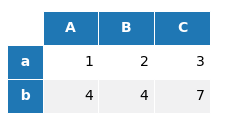

In [408]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#1f77b4', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, index_header=True, **kwargs):
    """
    Render a table from a DataFrame. 
    In order to include the index, use argument index_header=True
    """
    
    if ax is None: # This provides the size of the 'plot' and gets rid of axis ticks
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    
    if index_header is not None:
        index_header = []
        for i in data.index:
            index_header.append('  ' + i + '  ')
    
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, rowLabels=index_header, **kwargs)
    
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

ax = render_mpl_table(df[0:2], header_columns=0, col_width=1)
fig = ax.get_figure()
fig.savefig('pandas_indexing1.png', bbox_inches="tight", dpi=250)

In [163]:
'''df = pd.DataFrame({'A': ['one', 'two', 'three', 'two',
                          'three', 'two', 'one', 'two'],
                  'B': np.random.randint(0,8, size=8),
                   'C': np.random.randint(1,10, size=8)})                  

df
df.groupby('A').sum()
#df.groupby(['A', 'B']).sum()'''


"df = pd.DataFrame({'A': ['one', 'two', 'three', 'two',\n                          'three', 'two', 'one', 'two'],\n                  'B': np.random.randint(0,8, size=8),\n                   'C': np.random.randint(1,10, size=8)})                  \n\ndf\ndf.groupby('A').sum()\n#df.groupby(['A', 'B']).sum()"

### Reshaping
For reshaping by stacking and unstacking, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-stacking)

#### Reshaping by stacking and unstacking 
*Changing the layout of a data set*
-    stack: “pivot” a level of (may be hierarchical) column labels. Returns a DataFrame with an index that is the new inner-most level of row labels
-    unstack: (inverse operation of stack) “pivot” a level of the (may be hierarchical) row index to the column axis. This produces a reshaped DataFrame with a new inner-most level that consists of column labels.

In [121]:
# The Python zip function takes iterable elements as an input, and returns an iterator
# If we pass two iterable objects of the same lengths, then an iterable of python tuples 
# will be returned, where each element of the tuple will be from those iterable lists
# Python's zip function is mainly used to combine data from two iterable elements together 

list1 = ['a', 'b', 'c', 'a', 'a', 'b']
list2 = ['one', 'two', 'one', 'two', 'one', 'two']
tuples1 = zip(list1, list2)
print (tuples1)
for i in tuples1:
    print (i)   

('bar', 'one')
('bar', 'two')
('baz', 'one')
('baz', 'two')
('foo', 'one')
('foo', 'two')
('qux', 'one')
('qux', 'two')


In [122]:
# Note that the * character in a function call "unpacks" a list (or other iterable), making each of its elements a separate argument
# The * character is known as the unpacking operator. When it appears behind an iterable object (in this case zip), 
# what it does is pass the items inside the iterable to the function's caller one by one. In this case, since the zip function 
# accepts a list of iterables in order to return their aligned tuples, zip(*list of lists) passes all the items inside the list of lists 
# as arguments to the zip function
# Also note that unpacking can be used within another iterable

tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
print (tuples)

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]


Convert a list of tuples using the classmethod MultiIndex.from_tuples() found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.from_tuples.html)

In [450]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randint(5, size=(8,2)),index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A  B
first second      
bar   one     0  0
      two     2  0
baz   one     2  0
      two     1  4

In [421]:
tuples_list = [('a', 'one'), ('b', 'two'), ('a', 'two'), ('b', 'two')]
index = pd.MultiIndex.from_tuples(tuples_list, names=['first', 'second'])
df = pd.DataFrame([[1,2], [4,4], [5,8], [2,2]], index=index, columns=['A', 'B'])
df

,,A,B
first,second,,
a,one,1,2
b,two,4,4
a,two,5,8
b,two,2,2


In [422]:
df.stack()

first  second   
a      one     A    1
               B    2
b      two     A    4
               B    4
a      two     A    5
               B    8
b      two     A    2
               B    2
dtype: int64

In [446]:
df3 = pd.DataFrame([[1,2], [4,4], [5,8], [2,2]], index=['a', 'b', 'a', 'b'], columns=['A', 'B'])
df3

,A,B
a,1,2
b,4,4
a,5,8
b,2,2


In [447]:
df3.stack()

a  A    1
   B    2
b  A    4
   B    4
a  A    5
   B    8
b  A    2
   B    2
dtype: int64

In [451]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0
               B    0
       two     A    2
               B    0
baz    one     A    2
               B    0
       two     A    1
               B    4
dtype: int64

The inverse operation of `stack()` is `unstack()`, which unstacks the last level (by default)

In [452]:
stacked.unstack()

A  B
first second      
bar   one     0  0
      two     2  0
baz   one     2  0
      two     1  4

#### Reshaping by pivoting DataFrame objects

`pivot_table()` can be used to create spreadsheet-style [pivot tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot).

In [126]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 2,
                   'B': ['A', 'B', 'C', 'D'] * 2,
                   'C': ['foo', 'foo', 'foo', 'foo', 'bar', 'bar', 'bar', 'bar'],
                   'D': np.random.randn(8).astype(int),
                   'E': np.random.randn(8).astype(int)})
df

,A,B,C,D,E
0,one,A,foo,1,1
1,one,B,foo,0,0
2,two,C,foo,1,1
3,three,D,foo,-1,0
4,one,A,bar,0,0
5,one,B,bar,0,0
6,two,C,bar,0,0
7,three,D,bar,0,0


In [127]:
# values - Use values in column 'D' in this example
# index - Group by the indexes 'A' and 'B'
# columns - The keys to group by on the pivot table are in this case in column 'C'
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C        bar  foo
A     B          
one   A    0    1
      B    0    0
three D    0   -1
two   C    0    1

 If one wants to omit missing values, do this by calling `to_string` 

If you need to specify a bit more data in order to properly [group](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby-specify), use `pd.Grouper` to provide this local control.

### Categorical
[Categoricals](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical) are a pandas data type that correspond to categorical variables in statistics. Also see the API documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html#api-arrays-categorical)

In [128]:
df = pd.DataFrame({"id": [1,2,3,4,5], "raw_grade": ['a', 'b', 'c', 'a', 'd']})

# Convert grades to a categorical type
df["grade"] = df["raw_grade"].astype("category")
df["grade"] 

0    a
1    b
2    c
3    a
4    d
Name: grade, dtype: category
Categories (4, object): [a, b, c, d]

In [129]:
df["grade"].cat.categories = ["very good", "good", "medium", "bad"]
df["grade"] = df["grade"].cat.set_categories(["very good", "good", "medium","bad"])
df["grade"]

0    very good
1         good
2       medium
3    very good
4          bad
Name: grade, dtype: category
Categories (4, object): [very good, good, medium, bad]

### Plotting
See the [plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization) documentation as well as the [ecosystem](https://pandas.pydata.org/pandas-docs/stable/ecosystem.html#ecosystem-visualization) section for further visualization libraries

Note that the `plot` method on Series and DataFrame is a wrapper around plt.plot() from matplotlib

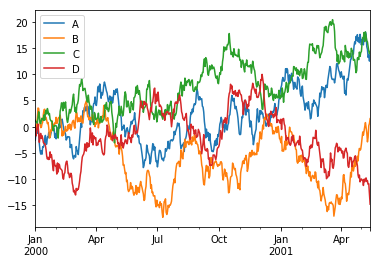

In [130]:
df = pd.DataFrame(np.random.randn(500, 4),
                index=pd.date_range('1/1/2000', periods=500), columns=list('ABCD'))

df = df.cumsum()

# plt.figure()

df.plot()

You can also plot one column versus another column using the x and y keywords in `plot()`

Use the `kind` keyword argument to `plot()`, in order to plot styles other than the default line plot.

In [131]:
#df.plot. # Use the tab key to see the other types of plots to use

### I/O


In [132]:
# Writing to a csv file:
df.to_csv('my_file.csv')

# Reading from a csv file:
pd.read_csv('my_file.csv')

# Writing to an excel file:
df.to_excel('my_file.xlsx', sheet_name='Sheet1')

# Reading from an excel file:
pd.read_excel('my_file.xlsx', sheet_name='Sheet1')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-2.540425,-0.984455,1.186726,0.262303
1,2000-01-02,-1.018059,-0.951006,0.947547,-1.772686
2,2000-01-03,-0.807983,0.232948,0.909822,-0.639988
3,2000-01-04,-1.232339,1.621568,0.642643,-0.205108
4,2000-01-05,-0.418764,3.553279,1.791678,0.508610
5,2000-01-06,-1.494092,3.486556,2.836750,-1.358374
6,2000-01-07,-3.259439,1.946863,1.905950,-2.995092
7,2000-01-08,-4.566565,0.493283,0.732980,-1.854375
8,2000-01-09,-5.227383,-0.182397,0.574325,-1.289387
9,2000-01-10,-4.574604,-0.092476,1.189693,-2.251390
